In [50]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
dataset = xr.open_dataset('/Users/annadugoul/Documents/ERA5/500_2geopot')
dataset

<xarray.Dataset>
Dimensions:    (longitude: 181, latitude: 101, time: 13248)
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 ... 2018-08-31T23:00:00
Data variables:
    z          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-24 13:59:01 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [53]:
dataarray = dataset.z.resample(time='1D').interpolate('linear')
dataarray

<xarray.DataArray 'z' (time: 5936, latitude: 101, longitude: 181)>
array([[[55889.1796875 , 55893.8828125 , 55898.37109375, ...,
         56072.18359375, 56036.140625  , 55998.3828125 ],
        [55939.6171875 , 55944.38671875, 55949.375     , ...,
         56089.13671875, 56054.875     , 56019.3984375 ],
        [55987.12890625, 55990.62109375, 55994.6796875 , ...,
         56107.87109375, 56076.171875  , 56042.12109375],
        ...,
        [57253.1171875 , 57247.9140625 , 57243.640625  , ...,
         57249.12890625, 57258.88671875, 57264.87109375],
        [57250.41015625, 57246.6328125 , 57243.92578125, ...,
         57261.37890625, 57268.64453125, 57272.13671875],
        [57249.91015625, 57246.6328125 , 57245.63671875, ...,
         57276.125     , 57279.40234375, 57281.89453125]],

       [[55931.3515625 , 55946.8828125 , 55961.625     , ...,
         56325.63671875, 56308.3984375 , 56292.0859375 ],
        [55983.63671875, 55997.88671875, 56011.6328125 , ...,
         56351.63671875, 56332.90234375, 56315.59375   ],
        [56035.140625  , 56046.11328125, 56056.37109375, ...,
         56375.859375  , 56356.125     , 56338.10546875],
...
        [57362.53125   , 57357.4765625 , 57352.2734375 , ...,
         57380.484375  , 57388.25      , 57393.734375  ],
        [57363.03125   , 57359.04296875, 57354.484375  , ...,
         57385.2578125 , 57395.515625  , 57402.78125   ],
        [57363.24609375, 57359.75390625, 57357.26171875, ...,
         57392.73828125, 57403.77734375, 57414.03515625]],

       [[56385.046875  , 56360.54296875, 56337.3203125 , ...,
         57039.5546875 , 57032.07421875, 57024.09765625],
        [56404.3515625 , 56380.34765625, 56357.8359375 , ...,
         57058.07421875, 57048.6015625 , 57038.5546875 ],
        [56424.0859375 , 56399.29296875, 56375.2890625 , ...,
         57079.3046875 , 57068.046875  , 57056.08203125],
        ...,
        [57335.3203125 , 57335.60546875, 57336.3203125 , ...,
         57745.84765625, 57756.60546875, 57764.296875  ],
        [57336.6015625 , 57337.31640625, 57338.3125    , ...,
         57754.5390625 , 57766.79296875, 57774.34375   ],
        [57339.80859375, 57339.30859375, 57340.59375   , ...,
         57761.8046875 , 57772.34765625, 57780.82421875]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 2002-06-02 ... 2018-08-31
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential

In [56]:
t = dataarray.sel(time=slice('2010-7-4', '2010-7-9'))
t

<xarray.DataArray 'z' (time: 6, latitude: 101, longitude: 181)>
array([[[56439.75390625, 56452.5078125 , 56464.26171875, ...,
         56197.484375  , 56171.984375  , 56145.484375  ],
        [56454.78515625, 56467.0390625 , 56477.51171875, ...,
         56217.00390625, 56192.        , 56166.99609375],
        [56470.03125   , 56479.7890625 , 56487.26953125, ...,
         56237.734375  , 56214.51171875, 56192.28515625],
        ...,
        [57029.5078125 , 57035.4921875 , 57044.75390625, ...,
         57864.2421875 , 57864.2421875 , 57863.2421875 ],
        [57029.01171875, 57031.7890625 , 57052.234375  , ...,
         57866.51953125, 57867.515625  , 57866.234375  ],
        [57030.79296875, 57031.00390625, 57062.27734375, ...,
         57869.51171875, 57869.296875  , 57869.01171875]],

       [[56265.515625  , 56269.71875   , 56272.99609375, ...,
         56493.46875   , 56466.46875   , 56438.7578125 ],
        [56258.25      , 56263.51953125, 56268.72265625, ...,
         56509.70703125, 56481.5       , 56452.71875   ],
        [56253.26171875, 56257.96484375, 56263.0234375 , ...,
         56521.9609375 , 56492.96875   , 56463.76171875],
...
        [57334.25390625, 57331.7578125 , 57325.4921875 , ...,
         57780.5390625 , 57786.0234375 , 57789.23046875],
        [57333.25390625, 57329.265625  , 57322.28515625, ...,
         57777.26171875, 57784.52734375, 57788.01953125],
        [57332.7578125 , 57327.984375  , 57321.00390625, ...,
         57775.48046875, 57781.53515625, 57786.5234375 ]],

       [[56662.578125  , 56650.609375  , 56637.57421875, ...,
         56168.84765625, 56202.828125  , 56234.8125    ],
        [56712.37109375, 56701.33203125, 56690.359375  , ...,
         56180.10546875, 56213.5859375 , 56246.56640625],
        [56760.59765625, 56750.33984375, 56739.8671875 , ...,
         56191.57421875, 56224.33984375, 56258.8203125 ],
        ...,
        [57438.11328125, 57437.61328125, 57439.109375  , ...,
         57668.55859375, 57670.33984375, 57670.5546875 ],
        [57436.83203125, 57438.61328125, 57441.81640625, ...,
         57666.06640625, 57669.34375   , 57669.83984375],
        [57424.578125  , 57430.34765625, 57437.828125  , ...,
         57662.359375  , 57665.3515625 , 57668.34375   ]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2010-07-04 2010-07-05 ... 2010-07-09
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential

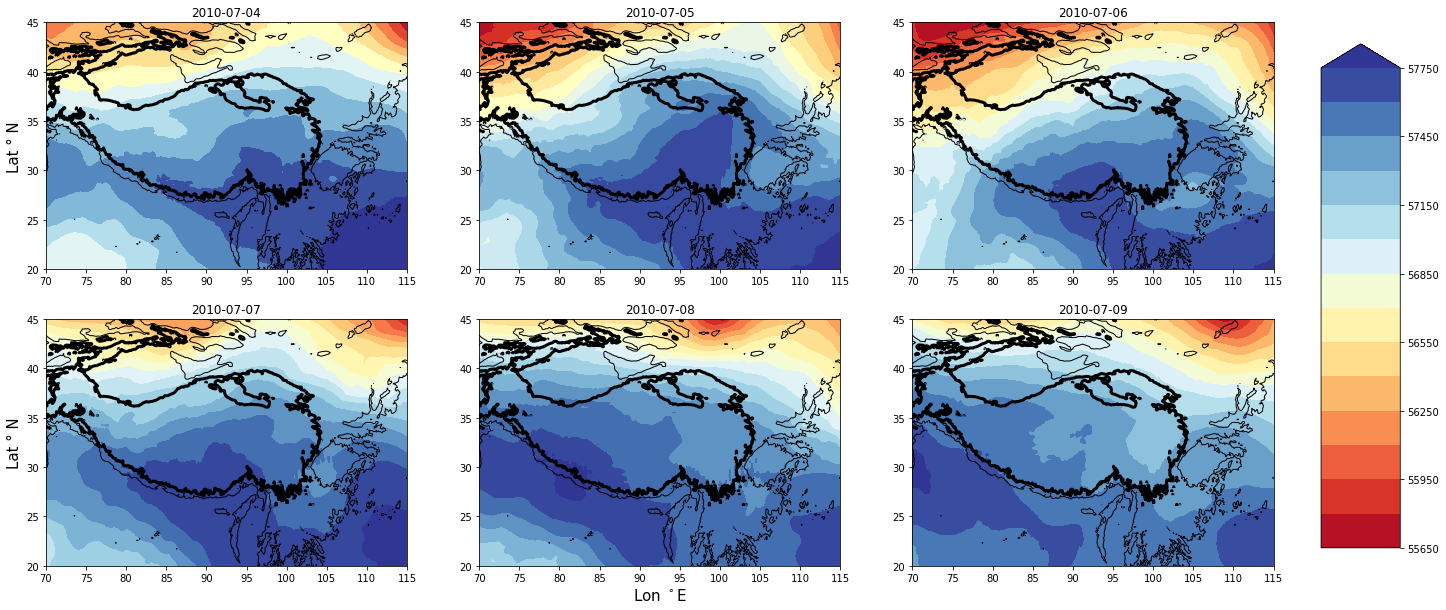

In [65]:
fig, ((ax1, ax2,ax3),(ax4,ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(22, 10))
out='/Users/annadugoul/Documents/Data_Thesis/Geopotential/0205june2002.png'
data = xr.open_dataset('/Users/annadugoul/Documents/Data_Thesis/GMTED2010_15n030_0125deg.nc')
lat = data.latitude
lon = data.longitude
elevations = data.elevation
ax1.set_xlim(70,115)
ax1.set_ylim(20,45)
ax2.set_xlim(70,115)
ax2.set_ylim(20,45)
ax3.set_xlim(70,115)
ax3.set_ylim(20,45)
ax4.set_xlim(70,115)
ax4.set_ylim(20,45)
ax5.set_xlim(70,115)
ax5.set_ylim(20,45)
ax6.set_xlim(70,115)
ax6.set_ylim(20,45)

cmap = plt.cm.RdYlBu
levels = 15

m=ax1.contourf(t.longitude,t.latitude,t[0], cmap=cmap, levels=levels, extend='max')
m=ax2.contourf(t.longitude,t.latitude,t[1], cmap=cmap, levels=levels, extend='max')
m=ax3.contourf(t.longitude,t.latitude,t[2], cmap=cmap, levels=levels, extend='max')
m=ax4.contourf(t.longitude,t.latitude,t[3], cmap=cmap, levels=levels, extend='max')
m=ax5.contourf(t.longitude,t.latitude,t[4], cmap=cmap, levels=levels, extend='max')
m=ax6.contourf(t.longitude,t.latitude,t[5], cmap=cmap, levels=levels, extend='max')
ax1.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax1.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax2.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax2.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax3.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax3.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax4.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax4.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax5.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax5.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax6.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax6.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
cbar_ax = fig.add_axes([0.93, 0.15, 0.05, 0.7])
fig.colorbar(m,cax=cbar_ax)
ax1.set_title(str(t.time.values[0])[0:10])
ax2.set_title(str(t.time.values[1])[0:10])
ax3.set_title(str(t.time.values[2])[0:10])
ax4.set_title(str(t.time.values[3])[0:10])
ax5.set_title(str(t.time.values[4])[0:10])
ax6.set_title(str(t.time.values[5])[0:10])

ax1.set_ylabel('Lat ° N',  fontsize=15)
ax4.set_ylabel('Lat ° N',  fontsize=15)

ax5.set_xlabel('Lon $^\circ$E',  fontsize=15)

fig.subplots_adjust()
plt.savefig(out,bbox_inches = 'tight', transparent = False, facecolor = 'white')